<a href="https://colab.research.google.com/github/joelchrispin/Data-Challenge/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Importer les modules nécessaires
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

## Analyse du fichier de détails de communication 

In [6]:
# Importer le fichier
uploaded = files.upload()

Saving details_communications-20230301.csv to details_communications-20230301.csv


In [8]:
# Créer un DF
df_comm = pd.read_csv("details_communications-20230301.csv")
df_comm.head()

,Conversation_ID,Date,Time,Agent,Service,Direction,Langue,Niveau,Matiere,temps_comm,temps_attente
0,c3cba6ca-fe7b-500f-868d-de736d1abcc6,2021-03-10,15:48,J64XARaywiYGL8DlQ6dk76Or11g=,SMS,direct,fr,NaN,NaN,414,NaN
1,4a5d8a5b-a96a-57a2-a8a6-d541ad63d0d9,2021-03-10,15:56,J64XARaywiYGL8DlQ6dk76Or11g=,Call,direct,fr,NaN,NaN,158,NaN
2,218c1480-e771-5f0d-97e1-d9be0b9ff70e,2021-03-10,16:05,J64XARaywiYGL8DlQ6dk76Or11g=,Chat,direct,fr,NaN,NaN,520,6.0
3,ac877e0f-e353-5214-89ef-a201839b02bb,2021-03-10,17:08,wdBCW8WvNcew3ZNHhAxgctlLMdc=,Chat,direct,fr,NaN,NaN,97,759.0
4,91a857fc-8270-54aa-bbae-4561ec525159,2021-03-10,16:41,wdBCW8WvNcew3ZNHhAxgctlLMdc=,SMS,direct,fr,NaN,NaN,187,NaN


In [31]:
df_comm.tail()

,Conversation_ID,Date,Time,Agent,Service,Direction,Langue,Niveau,Matiere,temps_comm,temps_attente
78499,db80bb8d-2aa7-5705-8096-cc7243a6db8a,2023-02-23,13:44,wZSftUbxDpMAvQ8S6jvnbx6B4bY=,Chat,direct,fr,primaire,math,606,3.0
78500,e7981173-da71-5089-a649-e1c9d58bc030,2023-02-23,14:17,wZSftUbxDpMAvQ8S6jvnbx6B4bY=,Chat,direct,fr,primaire,math,2150,3.0
78501,817aeaaf-ffb2-51b9-b07b-72df457c3ffd,2023-02-23,15:59,wZSftUbxDpMAvQ8S6jvnbx6B4bY=,Chat,direct,fr,secondaire,histoire,721,3.0
78502,c9126137-6cf0-50d3-a4b5-29651713672d,2023-02-23,13:52,wZSftUbxDpMAvQ8S6jvnbx6B4bY=,Chat,direct,fr,secondaire,histoire,6886,3.0
78503,b9e305ff-2fd9-5e4d-8318-7ad8d4c9eeeb,2023-02-28,07:06,pID7Syqe+4yyyCkeN6/vJd+haNI=,Chat,direct,fr,secondaire_1-2,math,87,6.0


In [10]:
# Information générale
df_comm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78504 entries, 0 to 78503
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Conversation_ID  78502 non-null  object 
 1   Date             78504 non-null  object 
 2   Time             78504 non-null  object 
 3   Agent            78504 non-null  object 
 4   Service          78504 non-null  object 
 5   Direction        78504 non-null  object 
 6   Langue           78504 non-null  object 
 7   Niveau           53579 non-null  object 
 8   Matiere          60112 non-null  object 
 9   temps_comm       78504 non-null  int64  
 10  temps_attente    73393 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 6.6+ MB


In [11]:
# Sommaire de la table
df_comm.describe()

,temps_comm,temps_attente
count,78504.000000,73393.000000
mean,1234.965174,175.540528
std,1764.840845,2686.446543
min,0.000000,1.000000
25%,377.000000,4.000000
50%,807.000000,7.000000
75%,1521.000000,23.000000
max,84839.000000,86349.000000


In [12]:
# La variable Niveau a beacoup de valeurs manquantes. Petite analyse de cette variable
df_comm.Niveau.value_counts()

secondaire        34451
secondaire_3-5     8122
primaire           7021
secondaire_1-2     3985
Name: Niveau, dtype: int64

In [39]:
# Même chose pour la variable Matière
df_comm.Matiere.value_counts(normalize = True)

math                    0.290741
sciences                0.193755
francais                0.134931
math_3_5                0.125965
math_1_2                0.061968
_                       0.035134
histoire                0.034902
anglais                 0.023090
physique                0.022691
chimie                  0.022591
geo_histoire            0.014922
autre                   0.014889
education_financiere    0.009233
geographie              0.008368
monde_contemporain      0.006787
null_null               0.000033
Name: Matiere, dtype: float64

In [15]:
df_comm.Service.value_counts(normalize = True)

Chat    0.443850
Call    0.419737
SMS     0.136413
Name: Service, dtype: float64

> - 44% des communications étaient par chat
> - 42% des communications étaient pas appel
> - 14% des communications étaient par SMS\
On peut grouper SMS et chat ensemble et affirmer qu'environ 60% des communications historiques se sont faits par messagerie



In [19]:
# Les données historiques couvrent une période de combien de temps?
print(df_comm.Date.min(), "à" , df_comm.Date.max())

2021-03-10 à 2023-02-28


> On a à peu près 2 ans de données historiques

In [30]:
# Quels sont les agents les plus populaires
df_comm.Agent.value_counts()

dIv8rTPYT91Ue2eNk5IvMFu/BVQ=    2942
+FTsDHZEVij6S/YlUmkBAjxYX40=    2751
HiF2bmJujC23YnxpivMsjTXRdsk=    2183
ibX58NPQ3cQnhiTnDKTCQK+JaMk=    2093
4pYTeKj/wRdgSJ8TiUiHVXp85dQ=    1872
                                ... 
FpFQF/YF5fT4geKjIrSyovKRpmg=       2
Z3evMq8zpT20/nX6lmlKTTe+HPI=       1
DP5jvp6M6LMZ9eN8Zg9tnEsx6Fs=       1
y/PI9XCLqePeMdofytFe+vka33M=       1
pID7Syqe+4yyyCkeN6/vJd+haNI=       1
Name: Agent, Length: 169, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '_'),
  Text(1, 0, 'anglais'),
  Text(2, 0, 'autre'),
  Text(3, 0, 'chimie'),
  Text(4, 0, 'education_financiere'),
  Text(5, 0, 'francais'),
  Text(6, 0, 'geo_histoire'),
  Text(7, 0, 'geographie'),
  Text(8, 0, 'histoire'),
  Text(9, 0, 'math'),
  Text(10, 0, 'math_1_2'),
  Text(11, 0, 'math_3_5'),
  Text(12, 0, 'monde_contemporain'),
  Text(13, 0, 'null_null'),
  Text(14, 0, 'physique'),
  Text(15, 0, 'sciences')])

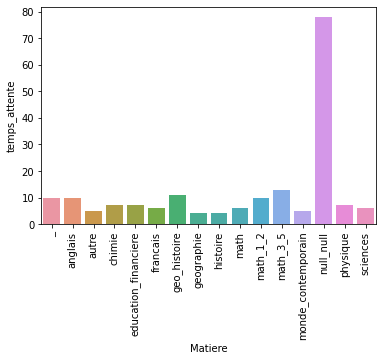

In [38]:
gb_temps_att = df_comm.groupby("Matiere")["temps_attente"].median().reset_index()
sns.barplot(x = "Matiere", y = "temps_attente", data = gb_temps_att)
plt.xticks(rotation = 90)

In [40]:
df_comm[df_comm["Matiere"] == "null_null"]

,Conversation_ID,Date,Time,Agent,Service,Direction,Langue,Niveau,Matiere,temps_comm,temps_attente
75636,509469b0-2958-5192-9768-1dc20a899740,2023-02-07,11:35,BvW4mlkpd/wF5kaC1H15FCrhiT4=,Chat,direct,fr,NaN,null_null,3,72.0
75660,497578b4-c432-518b-a51b-8832c4c85998,2023-02-07,11:37,SDrtrQIxhO09ITcVNQF/1y+ULWo=,Chat,direct,fr,NaN,null_null,2,84.0
